In [1]:
from pathlib import Path
import sys
sys.path.insert(1, str(Path.cwd().parent))
from tensor_hero.visualization import slice_notes, plot_chart
import numpy as np

charts_path = Path(r'C:\Users\cheny\OneDrive\Desktop\jackie_charts\blink-182 - Generational Divide')
expert = np.load(charts_path / 'Expert_simplified.npy')
hard = np.load(charts_path / 'Hard_simplified.npy')
medium = np.load(charts_path / 'Medium_simplified.npy')
easy = np.load(charts_path / 'Easy_simplified.npy')

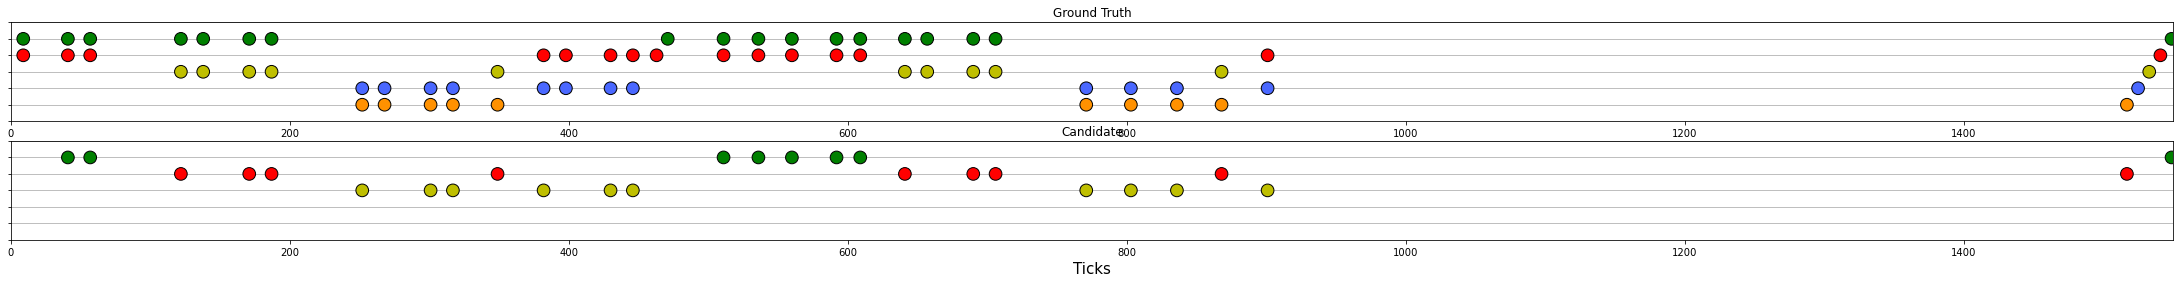

In [3]:

_ = plot_chart(slice_notes(expert,35,56), slice_notes(easy,35,56))

Easy level: the orange(5) & the blue (4) is out. 
- G1, R2, Y3, GR6,GY7,RY10

Medium level: the orange(5) is out 

Hard: less chord

In [58]:
#distribution of keys in expert songs
uniques, counts = np.unique(expert, return_counts=True)
percentages = dict(zip(uniques, counts * 100 / len(expert)))
percentages

{0.0: 96.51485148514851,
 1.0: 0.0594059405940594,
 2.0: 0.07920792079207921,
 3.0: 0.019801980198019802,
 4.0: 0.019801980198019802,
 5.0: 0.019801980198019802,
 6.0: 0.4158415841584158,
 7.0: 0.8514851485148515,
 10.0: 0.07920792079207921,
 11.0: 1.188118811881188,
 14.0: 0.15841584158415842,
 15.0: 0.594059405940594}

In [33]:
# distribution of different keys in easy songs
uniques, counts = np.unique(easy, return_counts=True)
percentages = dict(zip(uniques, counts * 100 / len(easy)))
percentages

{0.0: 97.92079207920793,
 1.0: 0.5148514851485149,
 2.0: 0.49504950495049505,
 3.0: 1.0495049504950495,
 7.0: 0.019801980198019802}

Notes Pattern Conversion

In [72]:
# 15(OB) - 3
# 11(RB) - 3 
# ANYTHING WITH B CAN BE 3 
## 8 (GB)
## 13(YB)
## 17 (GRB)
## 19 (GYB)
## 22(RYB)

# 14(OY) - 2
# 10(RY) - 2
# 7(GY) - 2
# ANYTHING WITH Y CAN BE 2
# 10(RY) - 7(GY)

# 6(GR) - 1
# 7(GY) - 1
#ANYTHING WITH G CAN BE 1


#7 is also simple 



11.0
3.0


All easy notes are present in the expert songs

In [10]:
#same notes of the easy songs
print(np.intersect1d(idx_easy, idx_expert))

[ 249  298  330  363  395  444  476  509  557  590  638  703  736  768
  817  849  882  914  963  995 1076 1109 1157 1222 1255 1287 1336 1368
 1401 1433 1482 1514 1546 1595 1628 1676 1741 1773 1806 1855 1887 1919
 1952 2001 2033 2065 2114 2146 2195 2260 2292 2373 2406 2455 2503 2536
 2584 2633 2665 2714 2779 2811 2844 2892 2925 2973 3022 3055 3103 3152
 3184 3298 3330 3363 3411 3428 3492 3541 3557 3622 3671 3687 3752 3801
 3817 3849 3882 3930 3946 4011 4036 4060 4092 4109 4141 4190 4206 4271
 4303 4336 4368 4401 5017 5049]


In [13]:
np.in1d(np.intersect1d(idx_easy, idx_expert),idx_easy)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [53]:
# easy song has len of 105, almost the same as the intersection len
len(np.intersect1d(idx_easy, idx_expert))

104

In [56]:
#the intervals between expert songs 
np.diff(idx_expert)

array([[ 16,  33,  16,  16,  33,  16,  16,  33,  16,  32,  33,  16,  32,
         16,  17,  32,  16,  17,  32,  16,  33,  16,  16,  16,  33,  16,
         16,  33,  16,  16,  32,  17,  32,  49,  32,  16,  17,  32,  16,
         16,  33,  16,  33,  32,  16,  33,  16,  16,  33,  16,  16,  32,
         17,  32,  32,  17,  32,  16,  17,  32,  16,  16,  33,  16,  32,
         33,  16,  33,  16,  16,  32,  17,  16,  32,  17,  32,  32,  17,
         32,  16,  16,  33,  16,  16,  33,  16,  32,  49,  32,  17,  16,
         32,  17,  16,  32,  16,  17,  32,  16,  17,  32,  16,  16,  33,
         16,  16,  33,  16,  32,  33,  16,  32,  17,  16,  32,  16,  17,
         32,  16,  17,  32,  16,  16,  33,  16,  16,  33,  32,  33,  16,
         32,  33,  16,  32,  17,  16,   8,  40,  17,  32,  16,  65,  16,
         33,  16,  65,  16,  33,  16,  32,  33,  16,  32,  16,  17,   8,
         40,  25,  24,  32,  17,  32,  16,  33,  16,  65,  32,  33,  32,
         33, 616,   8,   8,   8,   8]], dtype=int64

In [62]:
# the intervals between easy songs 
np.diff(idx_easy)

array([[ 49,  32,  33,  32,  49,  32,  33,  48,  33,  48,  65,  33,  32,
         49,  32,  33,  32,  49,  32,  33,  48,  33,  48,  65,  33,  32,
         49,  32,  33,  32,  49,  32,  32,  49,  33,  48,  65,  32,  33,
         49,  32,  32,  33,  49,  32,  32,  49,  32,  49,  65,  32,  81,
         33,  49,  48,  33,  48,  49,  32,  49,  65,  32,  33,  48,  33,
         48,  49,  33,  48,  49,  32, 114,  32,  33,  48,  17,  64,  49,
         16,  65,  49,  16,  65,  49,  16,  32,  33,  48,  16,  65,  25,
         24,  32,  17,  32,  49,  16,  65,  32,  33,  32,  33, 616,  32]],
      dtype=int64)

In [107]:
import pandas as pd 
df_exp = pd.DataFrame(expert,columns= ['expert_note'])
df_easy = pd.DataFrame(easy,columns= ['easy_note'])
df_train = df_exp.join(df_easy)
df_train['Shown'] = (df_train['expert_note'] != 0.0) & (df_train["easy_note"] != 0.0)
df_full = df_train.loc[df_train['expert_note'] != 0.0]
df_full.head()

,expert_note,easy_note,Shown
249,11.0,3.0,True
265,11.0,0.0,False
298,11.0,3.0,True
314,11.0,0.0,False
330,11.0,3.0,True


In [102]:
df_full['Prev'] = df_full.Shown.shift(1)
df_full.head(30)

<ipython-input-102-16d45390fc2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full['Prev'] = df_full.Shown.shift(1)


,expert_note,easy_note,Shown,Prev
249,11.0,3.0,1,NaN
265,11.0,0.0,0,1.0
298,11.0,3.0,1,0.0
314,11.0,0.0,0,1.0
330,11.0,3.0,1,0.0
363,11.0,3.0,1,1.0
379,11.0,0.0,0,1.0
395,11.0,3.0,1,0.0
428,11.0,0.0,0,1.0
444,11.0,3.0,1,0.0


In [106]:
# distribution of different keys in expert songs
uniques, counts = np.unique(df_full['expert_note'], return_counts=True)
percentages = dict(zip(uniques, counts * 100 / len(df_full)))
percentages

{1.0: 1.7045454545454546,
 2.0: 2.272727272727273,
 3.0: 0.5681818181818182,
 4.0: 0.5681818181818182,
 5.0: 0.5681818181818182,
 6.0: 11.931818181818182,
 7.0: 24.431818181818183,
 10.0: 2.272727272727273,
 11.0: 34.09090909090909,
 14.0: 4.545454545454546,
 15.0: 17.045454545454547}

In [105]:
# distribution of different keys in easy songs
uniques, counts = np.unique(df_full['easy_note'], return_counts=True)
percentages = dict(zip(uniques, counts * 100 / len(df_full)))
percentages

{0.0: 40.90909090909091,
 1.0: 14.772727272727273,
 2.0: 14.204545454545455,
 3.0: 30.113636363636363}

In [95]:
df_full["Shown"] = df_full["Shown"].astype(int)
df_full["Prev"] = df_full["Prev"].astype(int)
df_full.head(10)

<ipython-input-95-6e5040fd27fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full["Shown"] = df_full["Shown"].astype(int)


In [98]:
from  sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

inputs = df_full.drop(['Shown','easy_note'], axis = 'columns')
target = df_full['Shown']

#split into train and validation set without scaler
X_train, X_val, y_train, y_val = train_test_split(inputs, target, test_size=0.2, random_state=42)

Song 2 explore

In [86]:
charts_path = Path(r'C:\Users\cheny\OneDrive\Desktop\jackie_charts\Billie Eilish - bad guy')
expert = np.load(charts_path / 'Expert_simplified.npy')
hard = np.load(charts_path / 'Hard_simplified.npy')
medium = np.load(charts_path / 'Medium_simplified.npy')
easy = np.load(charts_path / 'Easy_simplified.npy')

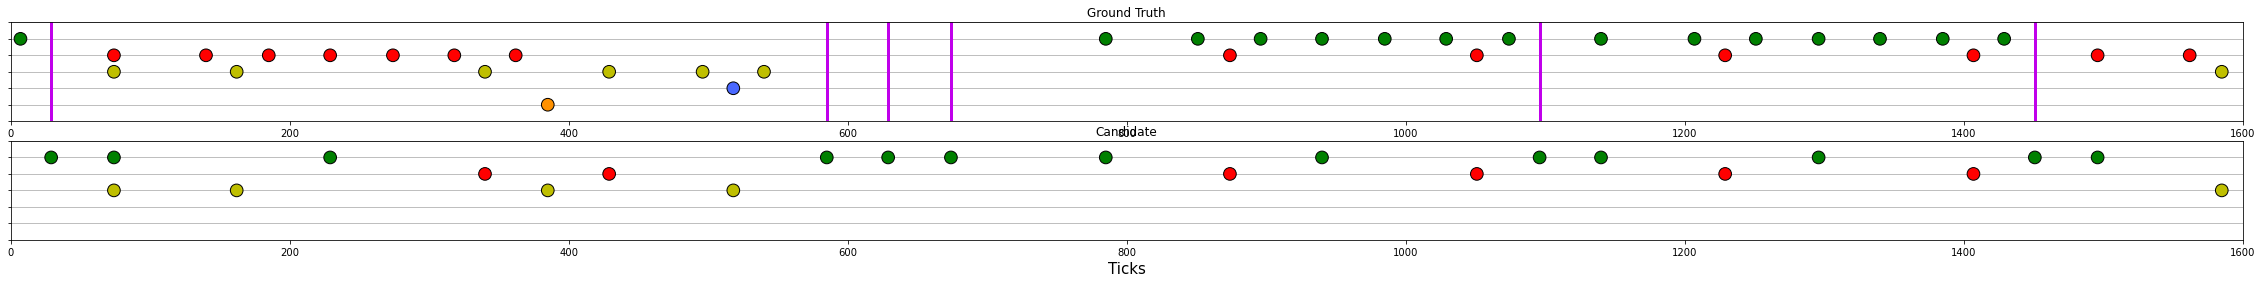

In [92]:
_ = plot_chart(slice_notes(expert,20,36), slice_notes(easy,20,36))